In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
# Read the CSV file
df = pd.read_csv('solar-data-khi.csv', parse_dates=['time'])
df.head()

,time,ghi_pyr,ghi_rsi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,sensor_cleaning,comments
0,2015-04-22 14:40:00,846.6,853.1,722.7,239.6,36.4,17.1,6.4,11.4,18.5,235.7,997.7,1,NaN
1,2015-04-22 14:50:00,810.1,813.6,694.3,237.7,34.9,30.8,7.3,10.9,19.9,218.3,997.7,1,NaN
2,2015-04-22 15:00:00,808.0,811.6,727.1,225.8,34.5,28.6,7.4,11.2,17.1,225.1,997.7,0,NaN
3,2015-04-22 15:10:00,784.0,787.3,722.6,222.0,34.7,27.2,6.9,11.2,19.1,238.0,997.7,0,NaN
4,2015-04-22 15:20:00,745.2,666.5,631.2,185.1,35.0,27.7,6.1,9.4,19.2,227.3,997.6,0,NaN


In [3]:
df.isnull().sum() 

time                               0
ghi_pyr                            0
ghi_rsi                            0
dni                                0
dhi                                0
air_temperature                    0
relative_humidity                  0
wind_speed                         0
wind_speed_of_gust                 0
wind_from_direction_st_dev         0
wind_from_direction                0
barometric_pressure                0
sensor_cleaning                    0
comments                      106473
dtype: int64

In [4]:
print(df.columns)

Index(['time', 'ghi_pyr', 'ghi_rsi', 'dni', 'dhi', 'air_temperature',
       'relative_humidity', 'wind_speed', 'wind_speed_of_gust',
       'wind_from_direction_st_dev', 'wind_from_direction',
       'barometric_pressure', 'sensor_cleaning', 'comments'],
      dtype='object')


In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
106468    False
106469    False
106470    False
106471    False
106472    False
Length: 106473, dtype: bool

In [6]:
df.dtypes

time                          datetime64[ns]
ghi_pyr                              float64
ghi_rsi                              float64
dni                                  float64
dhi                                  float64
air_temperature                      float64
relative_humidity                    float64
wind_speed                           float64
wind_speed_of_gust                   float64
wind_from_direction_st_dev           float64
wind_from_direction                  float64
barometric_pressure                  float64
sensor_cleaning                        int64
comments                             float64
dtype: object

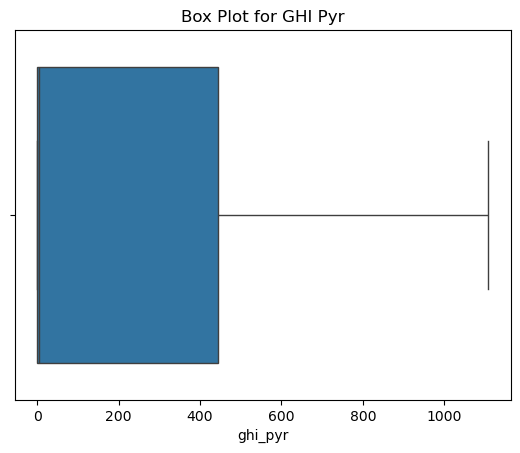

In [7]:
# Box plot for ghi_pyr
sns.boxplot(x=df['ghi_pyr'])
plt.title('Box Plot for GHI Pyr')
plt.show()

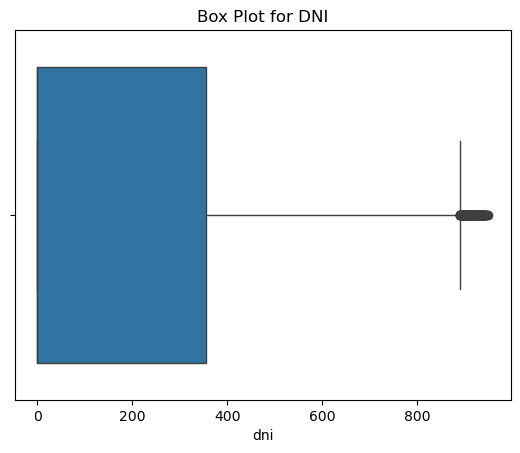

In [8]:
# Box plot for dni
sns.boxplot(x=df['dni'])
plt.title('Box Plot for DNI')
plt.show()

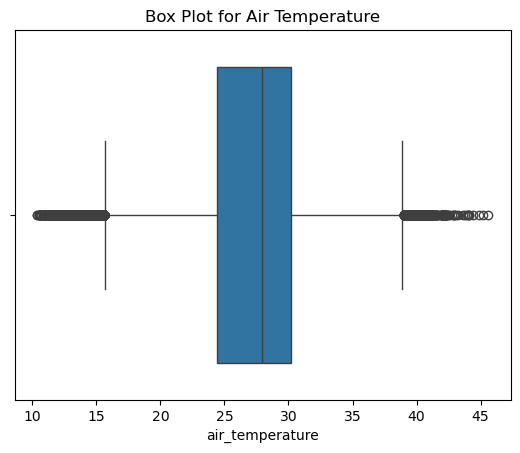

In [9]:
# Box plot for air_temperature
sns.boxplot(x=df['air_temperature'])
plt.title('Box Plot for Air Temperature')
plt.show()

In [10]:
mean = df['ghi_pyr'].mean()
std_dev = df['ghi_pyr'].std()
print(mean)
print(std_dev)

# Calculating the Z-score for each value in the 'ghi_pyr' column
df['z_score'] = (df['ghi_pyr'] - mean) / std_dev

threshold = 3


222.68372357311245
302.54303243158324


In [11]:
# Filter the rows where the Z-score is greater than the threshold (outliers)
outliers = df[df['z_score'] > threshold]

# Print the outliers DataFrame (should be empty if no outliers are found)
print(outliers)

Empty DataFrame
Columns: [time, ghi_pyr, ghi_rsi, dni, dhi, air_temperature, relative_humidity, wind_speed, wind_speed_of_gust, wind_from_direction_st_dev, wind_from_direction, barometric_pressure, sensor_cleaning, comments, z_score]
Index: []


In [12]:
# Calculate the mean and standard deviation of the 'dni' column
mean = df['dni'].mean()
std_dev = df['dni'].std()
print(mean)
print(std_dev)

df['z_score'] = (df['dni'] - mean) / std_dev

# Set the Z-score threshold to identify outliers (values > 3 standard deviations from the mean)
threshold = 3

outliers = df[df['z_score'] > threshold]


# Print the outliers DataFrame (rows with Z-scores above 3 are considered outliers)
print(outliers)

172.12023517699325
257.3637789046243
                     time  ghi_pyr  ghi_rsi    dni    dhi  air_temperature  \
31377 2015-11-26 12:10:00    768.5    754.5  944.4  104.2             27.8   
31378 2015-11-26 12:20:00    766.8    753.9  944.7  102.1             27.9   
31380 2015-11-26 12:40:00    761.1    749.0  946.6   97.8             28.7   
31382 2015-11-26 13:00:00    751.8    741.8  949.7   96.6             28.8   

       relative_humidity  wind_speed  wind_speed_of_gust  \
31377               11.6         3.7                 5.9   
31378               11.3         3.0                 5.0   
31380                9.8         3.2                 5.9   
31382                9.0         2.7                 4.9   

       wind_from_direction_st_dev  wind_from_direction  barometric_pressure  \
31377                        16.9                 22.4               1008.8   
31378                        30.5                  1.6               1008.5   
31380                        29.9 

In [13]:
# Define the level of Winsorization (5% for both lower and upper tails)
winsorization_level = 0.05

# Calculate the 5th percentile (lower bound) of 'dni'
lower_quantile = df['dni'].quantile(winsorization_level)

# Calculate the 95th percentile (upper bound) of 'dni'
upper_quantile = df['dni'].quantile(1 - winsorization_level)

# Winsorize the outliers by clipping values outside the range defined by the quantiles
df['dni'] = df['dni'].clip(lower=lower_quantile, upper=upper_quantile)


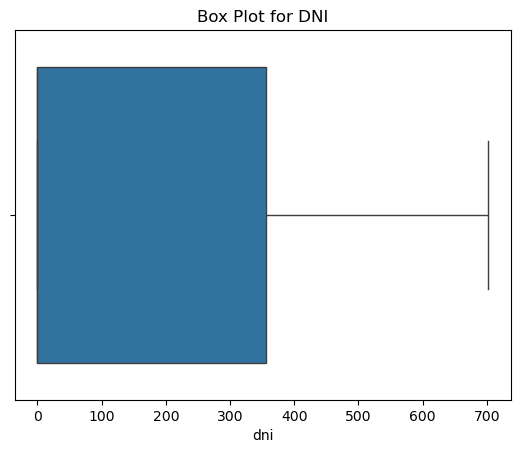

In [14]:
sns.boxplot(x=df['dni'])
plt.title('Box Plot for DNI')
plt.show()

In [15]:
mean = df['air_temperature'].mean()
std_dev = df['air_temperature'].std()
print(mean)
print(std_dev)

df['z_score'] = (df['air_temperature'] - mean) / std_dev

threshold = 3

outliers = df[df['z_score'] > threshold]

print(outliers)

27.022753186253794
4.9076313418810065
                     time  ghi_pyr  ghi_rsi    dni    dhi  air_temperature  \
1279  2015-05-01 11:50:00    957.1    952.2  589.1  375.2             41.9   
1280  2015-05-01 12:00:00    984.7    977.0  619.4  367.5             42.0   
1281  2015-05-01 12:10:00    996.0    985.2  629.1  363.5             42.0   
1282  2015-05-01 12:20:00    996.5    983.9  622.8  366.2             42.1   
1283  2015-05-01 12:30:00    982.7    970.7  596.4  377.3             42.9   
1284  2015-05-01 12:40:00    983.8    971.6  591.6  382.9             42.2   
1285  2015-05-01 12:50:00    979.3    965.4  588.6  380.8             42.2   
1286  2015-05-01 13:00:00    978.0    965.1  593.6  377.7             42.9   
1287  2015-05-01 13:10:00    967.6    954.9  582.8  380.9             42.8   
1288  2015-05-01 13:20:00    953.3    941.5  576.0  377.9             42.5   
1289  2015-05-01 13:30:00    944.9    935.4  574.4  378.2             42.3   
8483  2015-06-20 12:30:00 

In [16]:
winsorization_level = 0.05  # Set Winsorization level to 5%

# Calculate the lower and upper quantiles (5th and 95th percentiles)
lower_quantile = df['air_temperature'].quantile(winsorization_level)
upper_quantile = df['air_temperature'].quantile(1 - winsorization_level)

# Winsorize the outliers by capping values outside the quantile range
df['air_temperature'] = df['air_temperature'].clip(lower=lower_quantile, upper=upper_quantile)


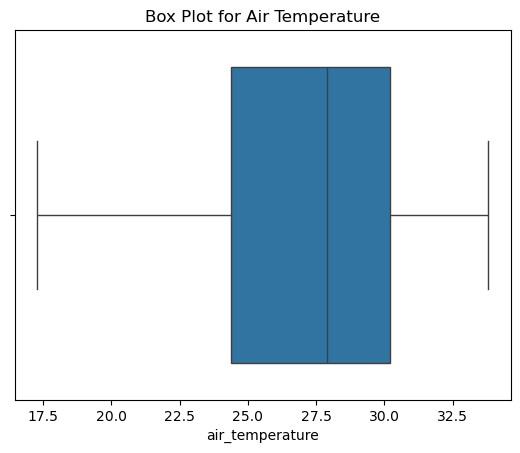

In [17]:
sns.boxplot(x=df['air_temperature'])
plt.title('Box Plot for Air Temperature')
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['ghi_pyr', 'ghi_rsi', 'dni', 'dhi', 'air_temperature',
       'relative_humidity', 'wind_speed', 'wind_speed_of_gust',
       'wind_from_direction_st_dev', 'wind_from_direction',
       'barometric_pressure', 'sensor_cleaning']

# Apply MinMax scaling to the numerical columns
df[numericals] = scaler.fit_transform(df[numericals])

In [19]:
df.head()

,time,ghi_pyr,ghi_rsi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,sensor_cleaning,comments,z_score
0,2015-04-22 14:40:00,0.763735,0.800432,1.000000,0.337085,1.0,0.118085,0.528926,0.572864,0.191511,0.654722,0.402899,1.0,NaN,1.910748
1,2015-04-22 14:50:00,0.730807,0.763370,0.988609,0.334412,1.0,0.263830,0.603306,0.547739,0.206004,0.606389,0.402899,1.0,NaN,1.605102
2,2015-04-22 15:00:00,0.728913,0.761494,1.000000,0.317670,1.0,0.240426,0.611570,0.562814,0.177019,0.625278,0.402899,0.0,NaN,1.523596
3,2015-04-22 15:10:00,0.707262,0.738694,1.000000,0.312324,1.0,0.225532,0.570248,0.562814,0.197723,0.661111,0.402899,0.0,NaN,1.564349
4,2015-04-22 15:20:00,0.672260,0.625352,0.898761,0.260411,1.0,0.230851,0.504132,0.472362,0.198758,0.631389,0.400000,0.0,NaN,1.625478


In [20]:
#sns.jointplot(x='ghi_pyr', y='air_temperature', data=df, kind='hex')

In [21]:
#sns.jointplot(x='ghi_pyr', y='wind_speed', data=df, kind='hex')

In [22]:
#sns.jointplot(x='ghi_pyr', y='relative_humidity', data=df, kind='hex')

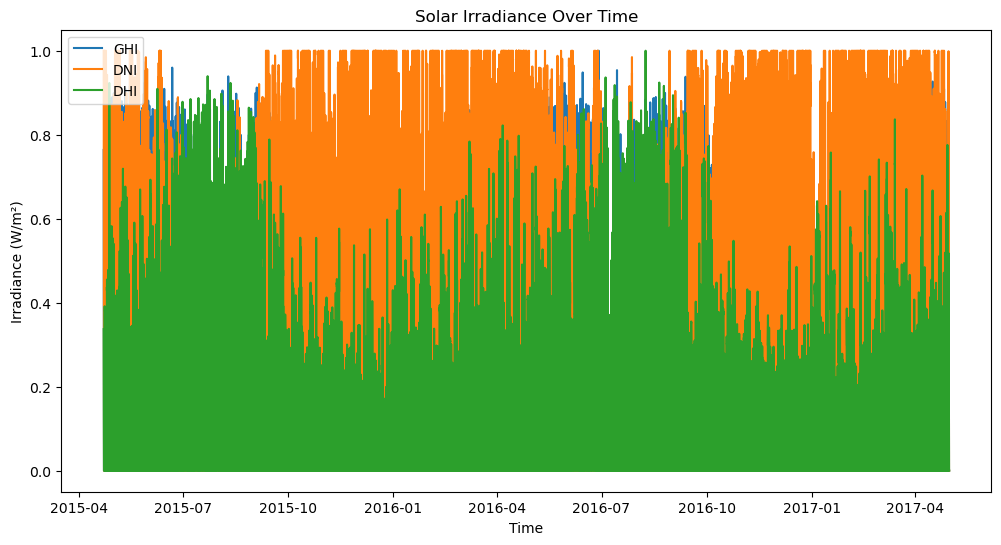

In [23]:

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['ghi_pyr'], label='GHI')
plt.plot(df['time'], df['dni'], label='DNI')
plt.plot(df['time'], df['dhi'], label='DHI')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.title('Solar Irradiance Over Time')
plt.legend()
plt.show()

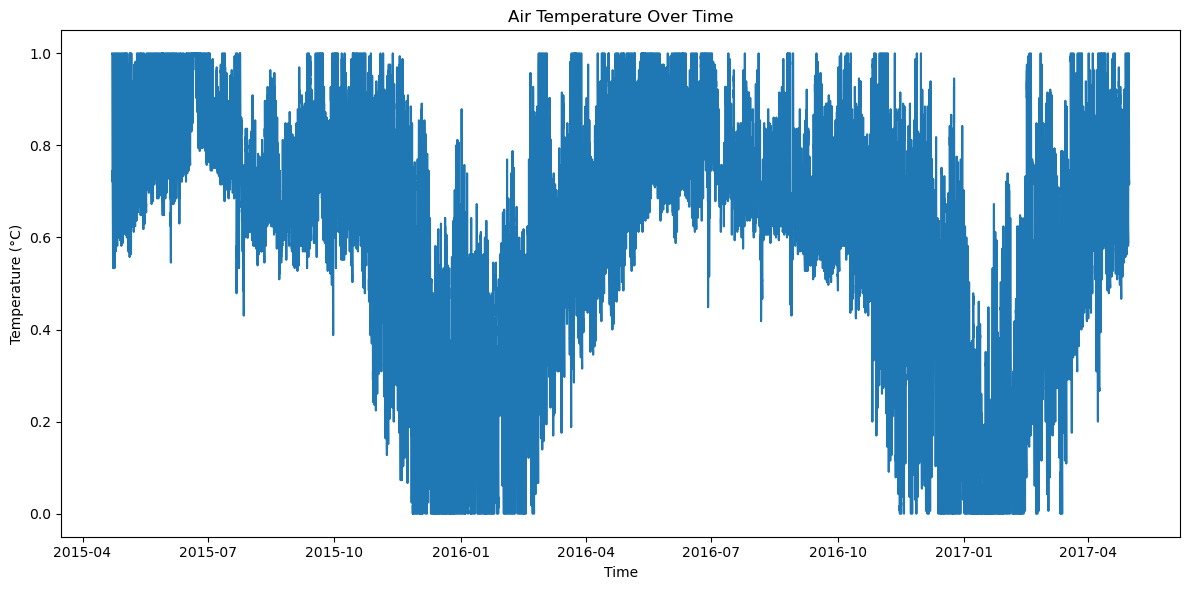

In [24]:
# Plotting air temperature
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['air_temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Air Temperature Over Time')
plt.tight_layout()
plt.show()

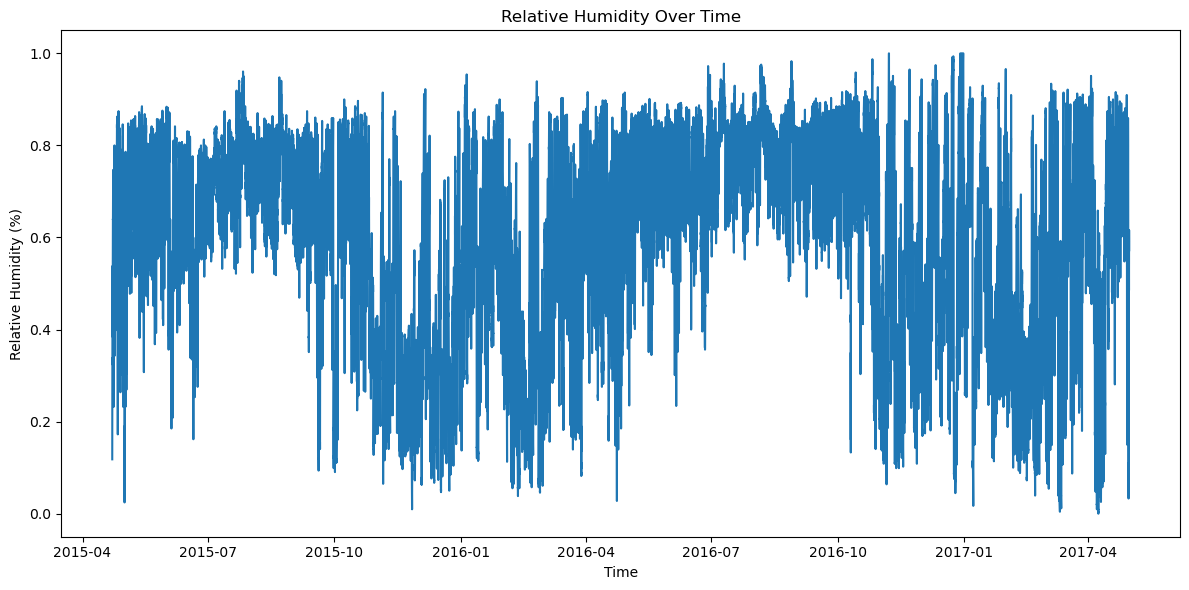

In [25]:
# Plotting relative humidity
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['relative_humidity'])
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Time')
plt.tight_layout()
plt.show()

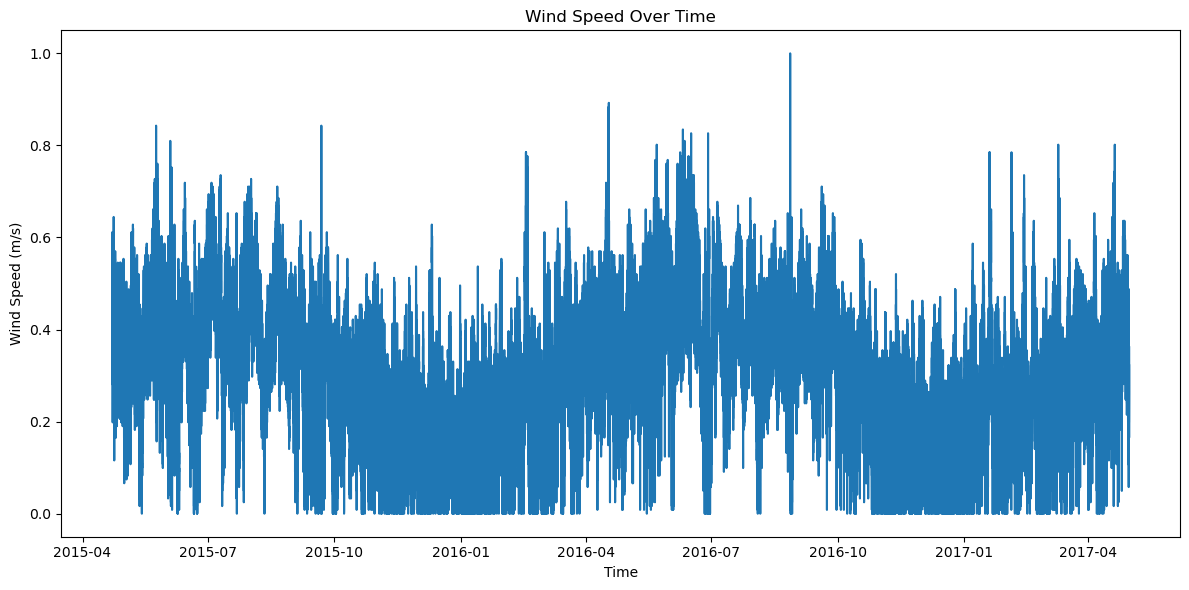

In [26]:
# Plotting wind speed
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['wind_speed'])
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Over Time')

plt.tight_layout()
plt.show()

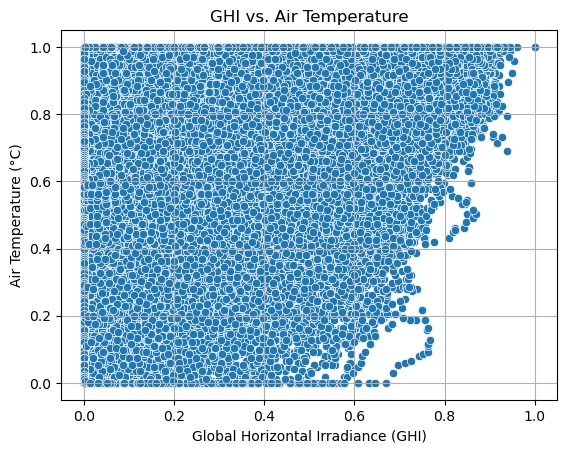

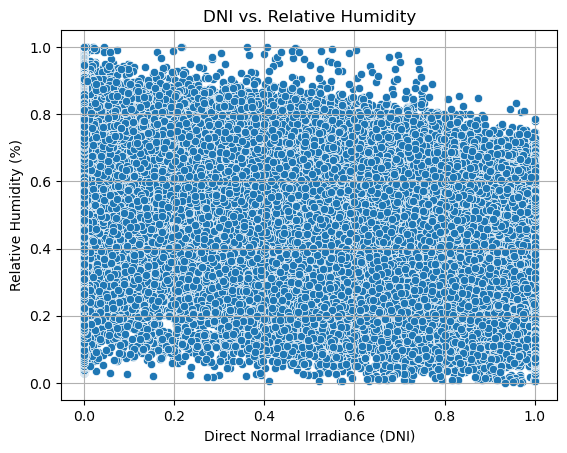

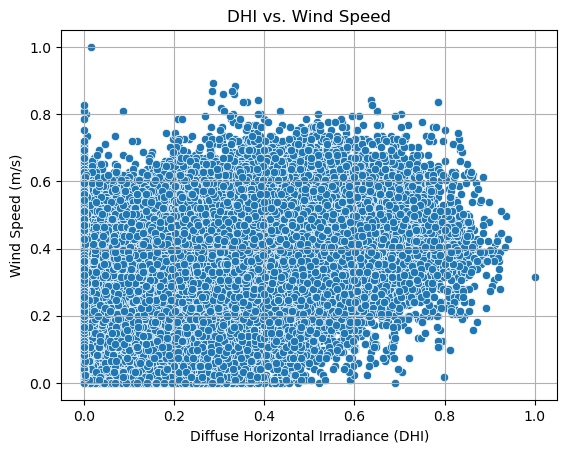

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of GHI vs. air temperature
sns.scatterplot(x='ghi_pyr', y='air_temperature', data=df)
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Air Temperature (°C)')
plt.title('GHI vs. Air Temperature')
plt.grid(True)
plt.show()

# Scatter plot of DNI vs. relative humidity
sns.scatterplot(x='dni', y='relative_humidity', data=df)
plt.xlabel('Direct Normal Irradiance (DNI)')
plt.ylabel('Relative Humidity (%)')
plt.title('DNI vs. Relative Humidity')
plt.grid(True)
plt.show()

# Scatter plot of DHI vs. wind speed
sns.scatterplot(x='dhi', y='wind_speed', data=df)
plt.xlabel('Diffuse Horizontal Irradiance (DHI)')
plt.ylabel('Wind Speed (m/s)')
plt.title('DHI vs. Wind Speed')
plt.grid(True)
plt.show()


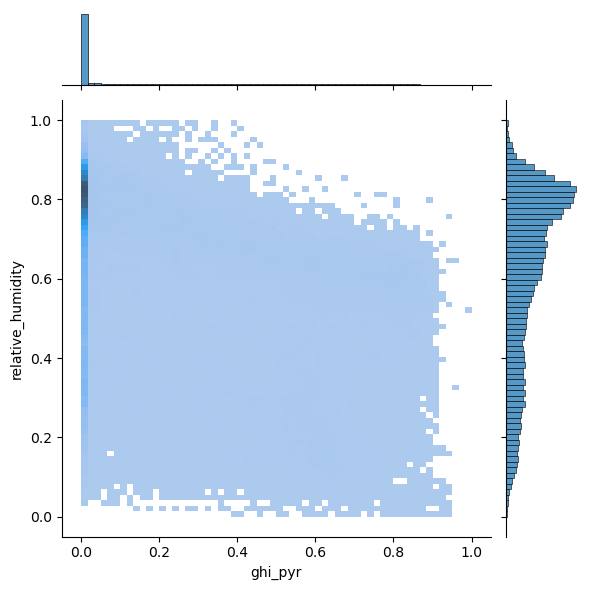

In [28]:
sns.jointplot(x='ghi_pyr', y='relative_humidity', data=df, kind='hist')

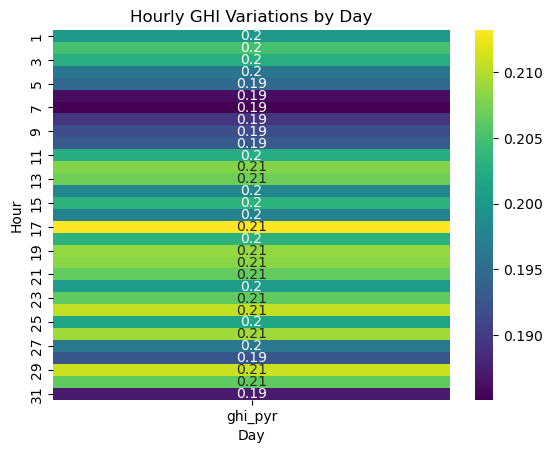

In [29]:
df['time'] = pd.to_datetime(df['time'])

df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day

df.rename(columns={'day': 'day_index'}, inplace=True)

df_pivoted = df.pivot_table(index='day_index', values='ghi_pyr')

# Create the heatmap
sns.heatmap(df_pivoted, cmap='viridis', annot=True)
plt.title('Hourly GHI Variations by Day')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()

In [30]:
# Check for duplicates in 'hour' and 'day_index'
print(df[df.duplicated(subset=['hour', 'day_index'], keep=False)])

# Drop extra 'day_index' columns (if any)
df = df.loc[:, ~df.columns.str.contains('^day_index')]


                      time   ghi_pyr   ghi_rsi       dni       dhi  \
0      2015-04-22 14:40:00  0.763735  0.800432  1.000000  0.337085   
1      2015-04-22 14:50:00  0.730807  0.763370  0.988609  0.334412   
2      2015-04-22 15:00:00  0.728913  0.761494  1.000000  0.317670   
3      2015-04-22 15:10:00  0.707262  0.738694  1.000000  0.312324   
4      2015-04-22 15:20:00  0.672260  0.625352  0.898761  0.260411   
...                    ...       ...       ...       ...       ...   
106468 2017-04-30 23:20:00  0.000000  0.000000  0.000000  0.000000   
106469 2017-04-30 23:30:00  0.000000  0.000000  0.000000  0.000000   
106470 2017-04-30 23:40:00  0.000000  0.000000  0.000000  0.000000   
106471 2017-04-30 23:50:00  0.000000  0.000000  0.000000  0.000000   
106472 2017-05-01 00:00:00  0.000000  0.000000  0.000000  0.000000   

        air_temperature  relative_humidity  wind_speed  wind_speed_of_gust  \
0              1.000000           0.118085    0.528926            0.572864   
1  

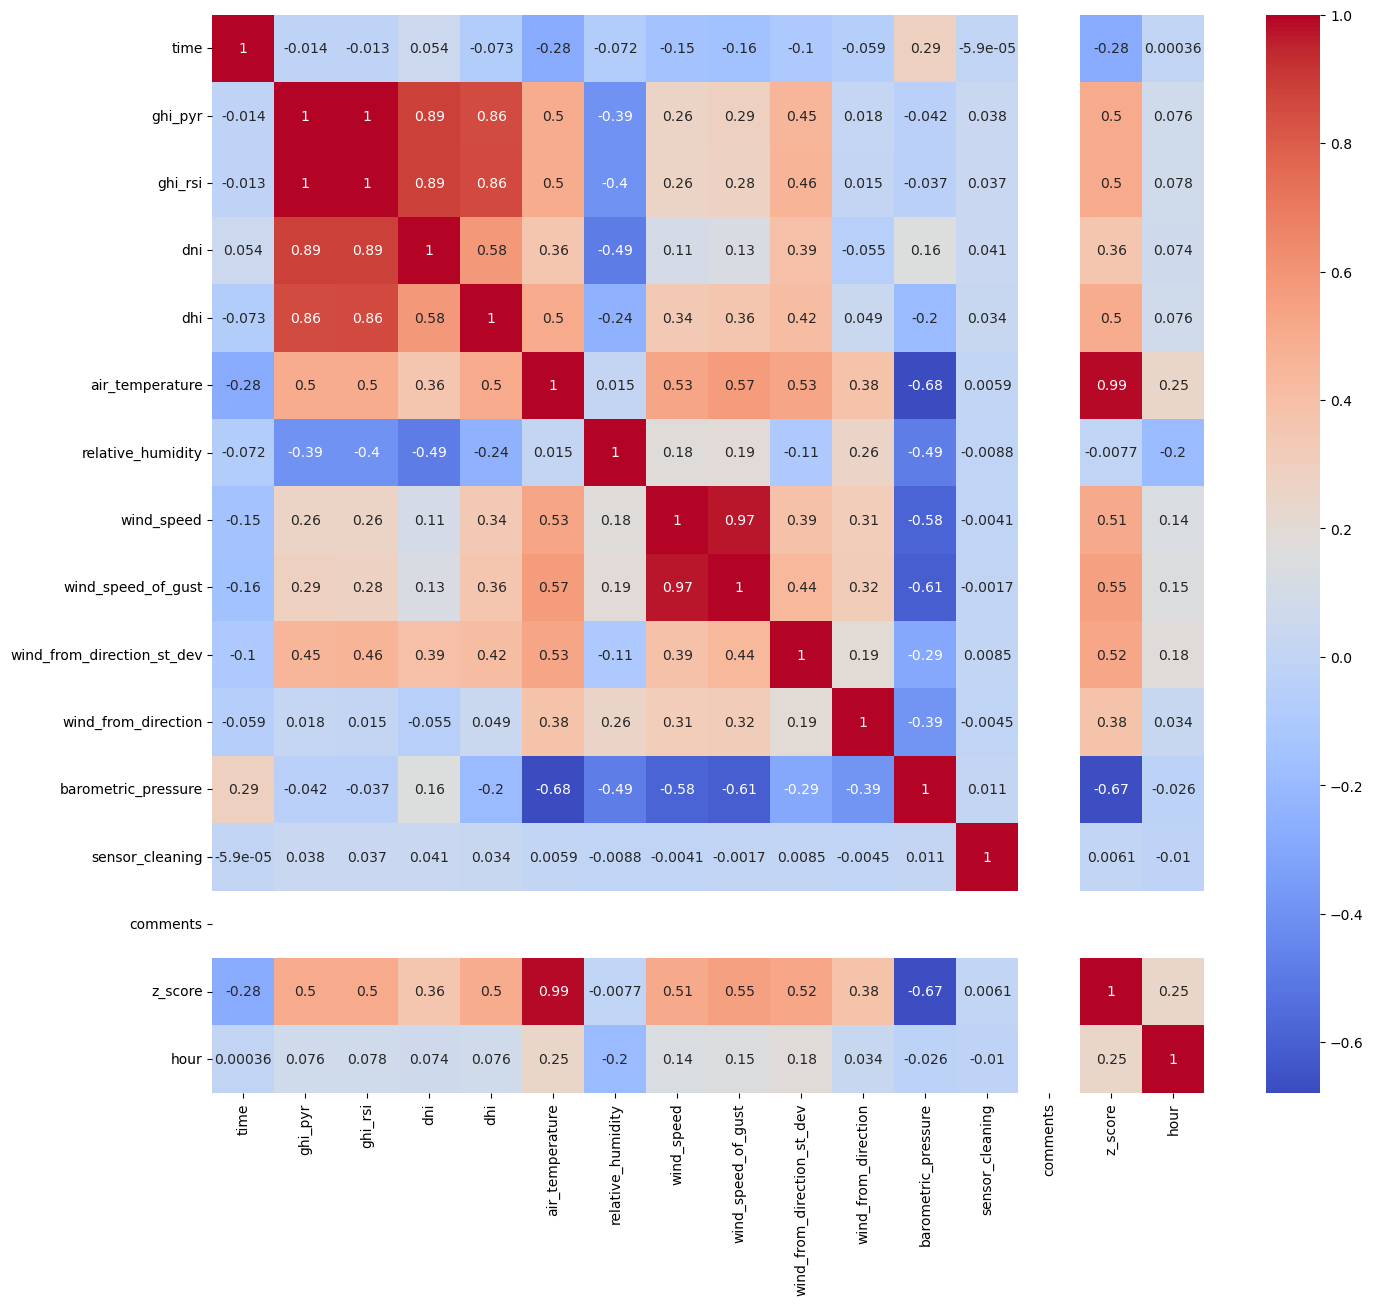

In [31]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [32]:
corr = df.corr()
corr

,time,ghi_pyr,ghi_rsi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,sensor_cleaning,comments,z_score,hour
time,1.000000,-0.013997,-0.012723,0.054385,-0.072677,-0.284587,-0.071921,-0.150064,-0.157599,-0.103364,-0.058838,0.289343,-0.000059,NaN,-0.280977,0.000361
ghi_pyr,-0.013997,1.000000,0.999739,0.885493,0.855549,0.501574,-0.394148,0.264711,0.288053,0.454347,0.017883,-0.041794,0.038054,NaN,0.504184,0.075918
ghi_rsi,-0.012723,0.999739,1.000000,0.888145,0.856107,0.500078,-0.400562,0.260645,0.284590,0.457392,0.015416,-0.036762,0.037450,NaN,0.502589,0.077708
dni,0.054385,0.885493,0.888145,1.000000,0.584762,0.357791,-0.490137,0.105033,0.128739,0.390234,-0.055060,0.158880,0.040855,NaN,0.363629,0.073866
dhi,-0.072677,0.855549,0.856107,0.584762,1.000000,0.502525,-0.239931,0.340826,0.362777,0.415549,0.048845,-0.198578,0.033727,NaN,0.497311,0.076345
air_temperature,-0.284587,0.501574,0.500078,0.357791,0.502525,1.000000,0.015048,0.530700,0.570111,0.529376,0.379314,-0.678706,0.005935,NaN,0.988549,0.246258
relative_humidity,-0.071921,-0.394148,-0.400562,-0.490137,-0.239931,0.015048,1.000000,0.179821,0.188819,-0.106519,0.256014,-0.488315,-0.008790,NaN,-0.007722,-0.195148
wind_speed,-0.150064,0.264711,0.260645,0.105033,0.340826,0.530700,0.179821,1.000000,0.970150,0.385506,0.311900,-0.581827,-0.004101,NaN,0.510456,0.140611
wind_speed_of_gust,-0.157599,0.288053,0.284590,0.128739,0.362777,0.570111,0.188819,0.970150,1.000000,0.439741,0.319381,-0.609794,-0.001717,NaN,0.549716,0.152942
wind_from_direction_st_dev,-0.103364,0.454347,0.457392,0.390234,0.415549,0.529376,-0.106519,0.385506,0.439741,1.000000,0.193970,-0.293005,0.008470,NaN,0.522384,0.181427


In [33]:
#Selecting highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(df, 0.85)
len(set(corr_features))

5

In [35]:
corr_features

{'dhi', 'dni', 'ghi_rsi', 'wind_speed_of_gust', 'z_score'}

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ghi_pyr', 'ghi_rsi',  'air_temperature',
       'relative_humidity', 'wind_speed', 'time',
       'wind_from_direction_st_dev', 'wind_from_direction',
       'barometric_pressure', 'sensor_cleaning'])
y = df['ghi_rsi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error: 0.00021394494920257105
R² Score: 0.9972248248402362


In [38]:
X = df.drop(columns=['ghi_pyr', 'time', 'ghi_rsi'])
y = df['ghi_rsi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0001415264221048041


In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")


Cross-validated MSE: 0.0003267630779147539


In [41]:
model.score(X_test, y_test)

0.9981641977876111

In [42]:
import xgboost as xgb

In [43]:
# Initializig XGBoost Regressor


model = xgb.XGBRegressor(
    n_estimators=100,          # Number of boosting rounds
    learning_rate=0.1,         # Step size shrinkage
    max_depth=6,               # Maximum depth of a tree
    subsample=0.8,             # Subsample ratio of the training instances
    colsample_bytree=0.8,      # Subsample ratio of columns
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00021545141405852447


In [44]:
model.score(X_test, y_test)

0.9972052838140849

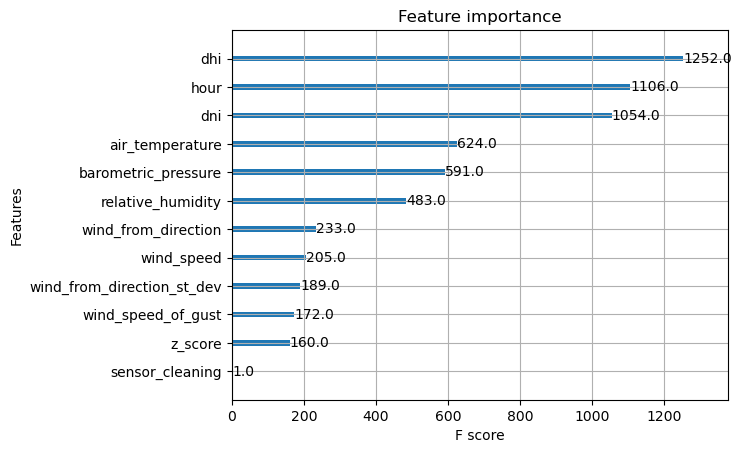

In [45]:
xgb.plot_importance(model)
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3
)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}


In [47]:
X = df.drop(columns=['ghi_pyr', 'ghi_rsi'])
y = df['ghi_rsi']

split_index = int(0.8 * len(X))  # 80% train, 20% test
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [48]:


# Dropping unnecessary columns
X = df.drop(columns=['ghi_pyr', 'ghi_rsi'])  # Assuming 'ghi_pyr' and 'ghi_rsi' are not needed as features
y = df['ghi_rsi']  # Target variable

# Extracting datetime features before splitting
X['year'] = X['time'].dt.year
X['month'] = X['time'].dt.month
X['day'] = X['time'].dt.day
X['hour'] = X['time'].dt.hour

# Dropping the 'time' column now that you've extracted the features
X = X.drop(columns=['time'])

# Splitting data (use iloc to avoid index issues)
split_index = int(0.8 * len(X))  # 80% train, 20% test
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Defining the model
model = xgb.XGBRegressor(
    n_estimators=200,          # Number of boosting rounds
    learning_rate=0.1,         # Step size shrinkage
    max_depth=9,               # Maximum depth of a tree
    subsample=0.8,             # Subsample ratio of the training instances
    colsample_bytree=0.8,      # Subsample ratio of columns
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test[:100].values, 'Predicted': y_pred[:100]})
print(comparison)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


    Actual  Predicted
0      0.0   0.000007
1      0.0   0.000015
2      0.0   0.000015
3      0.0   0.000015
4      0.0   0.000349
..     ...        ...
95     0.0  -0.000094
96     0.0   0.000017
97     0.0   0.000017
98     0.0   0.000017
99     0.0   0.000017

[100 rows x 2 columns]
Mean Squared Error: 0.00026840562821257754


In [49]:
model.score(X_test, y_test)

0.9966160736959888

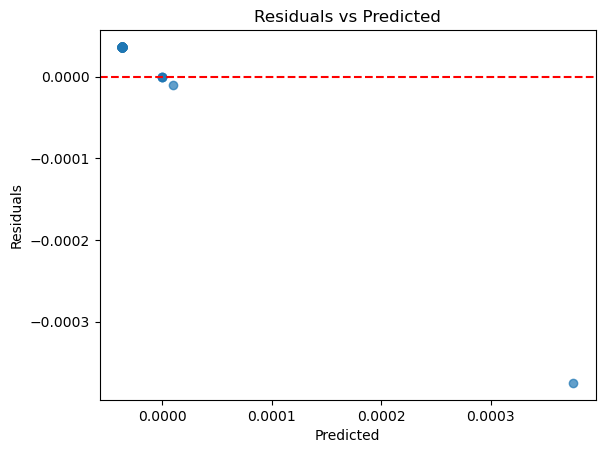

In [50]:
# Assuming you have already defined df1 as shown previously
data = {
    'Actual': [0.0] * 100,
    'Predicted': [9.855760e-06, -4.084993e-08, -4.084993e-08, -4.084993e-08, 3.750797e-04] + [-3.655533e-05] * 95
}
df1 = pd.DataFrame(data)

# Calculate Residuals (Actual - Predicted)
df1['Residuals'] = df1['Actual'] - df1['Predicted']

# Plot Residuals vs Predicted
plt.scatter(df1['Predicted'], df1['Residuals'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


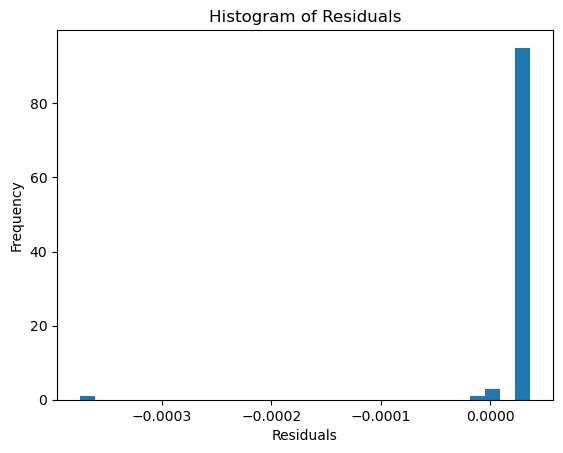

In [51]:
plt.hist(df1['Residuals'], bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
